[**Demo %s**](#demo-fdconverge-order12)

Let's observe the convergence of the formulas in {numref}`Example {number} <example-fd-converge-FD11>` and {numref}`Example {number} <example-fd-converge-FD12>`, applied to the function $\sin(e^{x+1})$ at $x=0$.

In [2]:
f = @(x) sin(exp(x + 1));
exact_value = exp(1) * cos(exp(1))

exact_value = -2.4783

We'll compute the formulas in parallel for a sequence of $h$ values.

In [3]:
h = 5 ./ 10.^(1:6)';
FD1 = zeros(size(h));
FD2 = zeros(size(h));
for i = 1:length(h)
    h_i = h(i);
    FD1(i) = (f(h_i) - f(0)    ) / h_i;
    FD2(i) = (f(h_i) - f(-h_i)) / (2*h_i);
end
disp(table(h, FD1, FD2))

      h         FD1        FD2  
    ______    _______    _______

       0.5    -2.7686    -1.9705
      0.05    -2.6128    -2.4755
     0.005    -2.4921    -2.4783
    0.0005    -2.4797    -2.4783
     5e-05    -2.4785    -2.4783
     5e-06    -2.4784    -2.4783



All that's easy to see from this table is that FD2 appears to converge to the same result as FD1, but more rapidly. A table of errors is more informative.

In [4]:
err1 = abs(exact_value - FD1);
err2 = abs(exact_value - FD2);
disp(table(h, err1, err2, variableNames=["h", "error in FD1", "error in FD2"]))

      h       error in FD1    error in FD2
    ______    ____________    ____________

       0.5        0.29023         0.50788 
      0.05        0.13445       0.0028295 
     0.005       0.013755      2.8038e-05 
    0.0005      0.0013781      2.8035e-07 
     5e-05     0.00013784       2.803e-09 
     5e-06     1.3784e-05      2.3529e-11 



In each row, $h$ is decreased by a factor of 10, so that the error is reduced by a factor of 10 in the first-order method and 100 in the second-order method.

A graphical comparison can be useful as well. On a log-log scale, the error should (as $h\to 0$) be a straight line whose slope is the order of accuracy. However, it's conventional in convergence plots to show $h$ _decreasing_ from left to right, which negates the slopes.

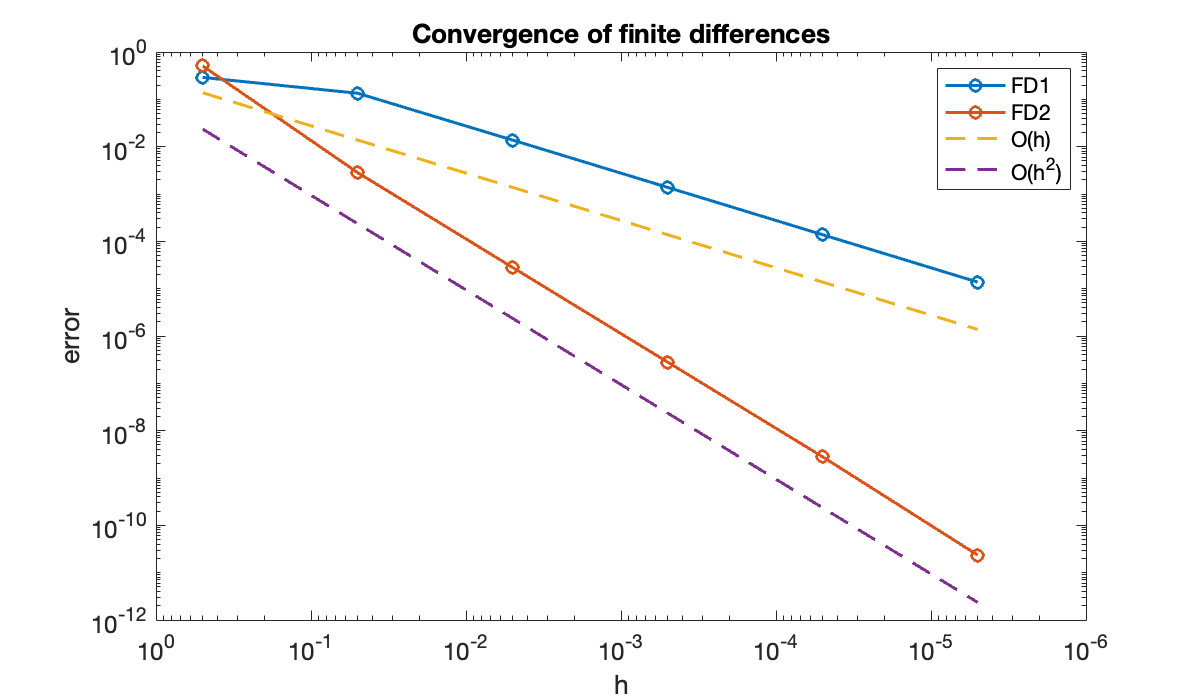

In [5]:
clf
loglog(h, abs([err1 err2]), "o-")
set(gca, "xdir", "reverse")
order1 = 0.1 * err1(end) * (h / h(end)) .^ 1;
order2 = 0.1 * err2(end) * (h / h(end)) .^ 2;
hold on
loglog(h, order1, "--", h, order2, "--")
xlabel("h");  ylabel("error")
title("Convergence of finite differences")
legend("FD1", "FD2", "O(h)", "O(h^2)");